In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

water_data_n=pd.read_csv('water_data.csv')

# Отфильтровать строки с отрицательными значениями
water_data = water_data_n.drop(water_data_n[(water_data_n['P'] < 0) | (water_data_n['T'] < 0) | (water_data_n['a_real'] < 0)].index)

# Вывести отфильтрованные данные
water_data.describe()

,P,T,a_real
count,57989.000000,57989.000000,57989.000000
mean,34.690445,2.182163,0.340220
std,8.664594,0.498826,0.080858
min,31.250000,2.000000,0.000049
25%,31.350000,2.010000,0.370348
50%,31.400000,2.010000,0.370885
75%,31.460000,2.020000,0.371331
max,70.370000,4.900000,0.372244


In [4]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57989 entries, 13393 to 71381
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P       57989 non-null  float64
 1   T       57989 non-null  float64
 2   a_real  57989 non-null  float64
dtypes: float64(3)
memory usage: 1.3 MB


Реализуем двухслойный перцептрон. 
Поскольку функция a(t) имеет вид сигмоиды, функцией активации модели будет sigmoid

Epoch 1/16
1813/1813 [==============================] - 10s 4ms/step - loss: 2.3840e-04
Epoch 2/16
1813/1813 [==============================] - 6s 3ms/step - loss: 1.8572e-05
Epoch 3/16
1813/1813 [==============================] - 6s 3ms/step - loss: 8.6539e-06
Epoch 4/16
1813/1813 [==============================] - 6s 3ms/step - loss: 5.3746e-06
Epoch 5/16
1813/1813 [==============================] - 6s 3ms/step - loss: 3.7270e-06
Epoch 6/16
1813/1813 [==============================] - 5s 3ms/step - loss: 2.7973e-06
Epoch 7/16
1813/1813 [==============================] - 6s 3ms/step - loss: 2.4416e-06
Epoch 8/16
1813/1813 [==============================] - 6s 3ms/step - loss: 2.2341e-06
Epoch 9/16
1813/1813 [==============================] - 6s 3ms/step - loss: 1.8609e-06
Epoch 10/16
1813/1813 [==============================] - 5s 3ms/step - loss: 1.6834e-06
Epoch 11/16
1813/1813 [==============================] - 5s 3ms/step - loss: 1.7805e-06
Epoch 12/16
1813/1813 [=================

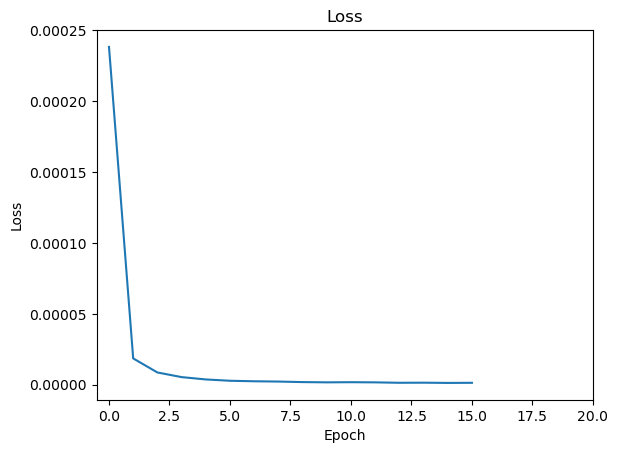

In [3]:
X = water_data[['P', 'T']].values
Y = water_data['a_real'].values

# Создание модели нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X, Y, epochs=16, verbose=1)

# Визуализация процесса обучения
plt.plot(history.history['loss'])
plt.xlim(-0.5,20)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [10]:
import os

# Проверка наличия директории
save_path = './ai_kinetics'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Сохранение модели
model.save(os.path.join(save_path, 'kinetics_model.h5'))

In [5]:
water_pred=model.predict(X)
water_pred

1813/1813 [==============================] - 3s 1ms/step


array([[0.00242221],
       [0.00242221],
       [0.00253224],
       ...,
       [0.3710875 ],
       [0.3710875 ],
       [0.3711377 ]], dtype=float32)

In [6]:
test_data=pd.read_csv('isoleucine_data.csv')
test_data = test_data.drop(test_data[(test_data['P'] < 0) | (test_data['T'] < 0) | (test_data['a_real'] < 0)].index)
test_data.head()

,P,T,a_real
1451,70.37,2.04,0.001326
1452,70.28,2.03,0.002202
1453,70.21,2.03,0.002904
1454,70.15,2.03,0.003505
1455,70.15,2.02,0.003479


In [7]:
Xtest = test_data[['P', 'T']].values
predictions = model.predict(Xtest)

# Добавление предсказанных значений в DataFrame
test_data['Predicted_a_real'] = predictions

# Вывод DataFrame с предсказанными значениями
test_data

684/684 [==============================] - 1s 2ms/step


,P,T,a_real,Predicted_a_real
1451,70.37,2.04,0.001326,0.002285
1452,70.28,2.03,0.002202,0.003075
1453,70.21,2.03,0.002904,0.003674
1454,70.15,2.03,0.003505,0.004188
1455,70.15,2.02,0.003479,0.004209
...,...,...,...,...
23329,31.37,2.07,0.374420,0.368834
23330,31.37,2.07,0.374420,0.368834
23331,31.37,2.07,0.374420,0.368834
23332,31.37,2.07,0.374420,0.368834


Код для повторного запуска сохраненной НС

In [2]:
import tensorflow as tf

# Загрузка сохраненной модели
model = tf.keras.models.load_model('ai_kinetics/kinetics_model.h5')

Загрузка данных

In [3]:
isoleucine_data=pd.read_csv('isoleucine_data.csv')
water_data=pd.read_csv('water_data.csv')
methionine_data=pd.read_csv('methionine_data.csv')
leucine_data=pd.read_csv('leucine_data.csv')


684/684 [==============================] - 4s 3ms/step
L-isoleucine - MSE: 1.8848684703698382e-05, MAE: 0.00413196487352252, R2: 0.9986900985643498, RMSE: 0.004341507330536842, Correlarion: 0.9997077616795224
1813/1813 [==============================] - 3s 2ms/step
Water - MSE: 9.224015116160444e-07, MAE: 0.0008924206485971808, R2: 0.9998589155287443, RMSE: 0.0009604173828847706, Correlarion: 0.9999879991067732
2290/2290 [==============================] - 3s 1ms/step
L-methionine - MSE: 2.953133480332326e-05, MAE: 0.005198325961828232, R2: 0.9909557926536968, RMSE: 0.005434274207800627, Correlarion: 0.9998072104357497
5181/5181 [==============================] - 8s 2ms/step
L-leucine - MSE: 9.72292764345184e-06, MAE: 0.0028142600785940886, R2: 0.996627308708579, RMSE: 0.00311816087923944, Correlarion: 0.9998952681501032


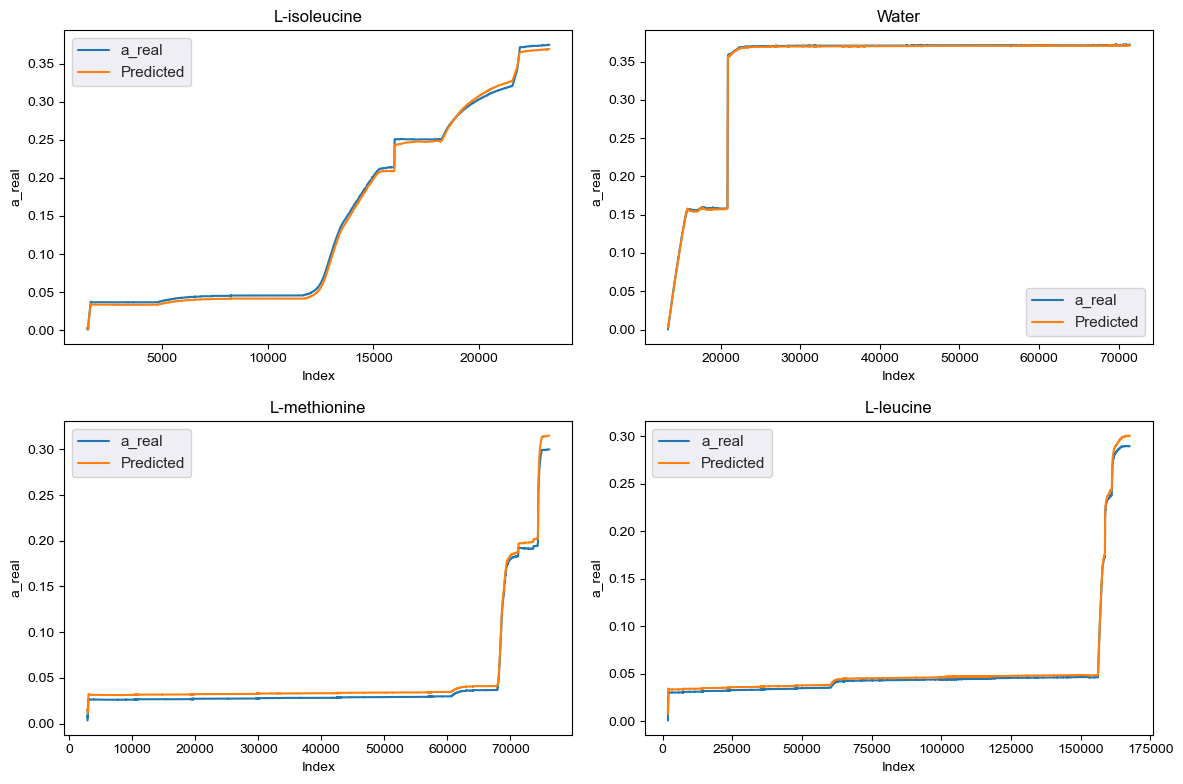

In [4]:
datasets={
        'L-isoleucine': isoleucine_data,
        'Water': water_data,
        'L-methionine': methionine_data,
        'L-leucine': leucine_data
        }
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.set(style="darkgrid")

# Удаление значений меньше нуля и соответствующих строк из каждого датасета
for i, (dataset_name, dataset) in enumerate(datasets.items()):
    dataset = dataset[dataset['a_real'] >= 0]

    # Предсказание целевой переменной
    X = dataset[['P', 'T']].values
    Y = dataset['a_real'].values
    predictions = model.predict(X)

    # Построение графиков
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot(dataset.index, dataset['a_real'], label='a_real')
    ax.plot(dataset.index, predictions.flatten(), label='Predicted')
    ax.set_title(dataset_name)
    ax.set_xlabel('Index')
    ax.set_ylabel('a_real')
    ax.legend()
    mse = tf.keras.losses.mean_squared_error(Y, predictions.flatten())
    mae = tf.keras.losses.mean_absolute_error(Y, predictions.flatten())
    r2 = r2_score(Y, predictions)
    rmse = np.sqrt(mse)
    corr = np.corrcoef(Y, predictions.flatten())[0, 1]
    print(f'{dataset_name} - MSE: {mse}, MAE: {mae}, R2: {r2}, RMSE: {rmse}, Correlarion: {corr}')

# Удаление пустых подграфиков
if len(datasets) < 4:
    for i in range(len(datasets), 4):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

# Сохранение графика
plt.tight_layout()
plt.savefig('combined_plot.png', dpi=1000)
plt.show()